In [1]:
import os
import re
#import textract
import spacy
#import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from textblob import TextBlob
import textract
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import warnings

warnings.filterwarnings('ignore')

In [2]:
os.listdir('Resumes_Docx')

['.ipynb_checkpoints',
 'Peoplesoft',
 'Peoplesoft Resume',
 'React Developer',
 'SQL Developer',
 'workday']

# About dataset

In [3]:
file_path = r'Resumes_Docx/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [4]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.docx
1,Peoplesoft Resume,Peoplesoft Admin_AnubhavSingh.docx
2,Peoplesoft Resume,Peoplesoft Admin_G Ananda Rayudu.doc
3,Peoplesoft Resume,Peoplesoft Admin_Gangareddy.doc
4,Peoplesoft Resume,Peoplesoft Admin_Murali.docx
...,...,...
75,workday,Sri Krishna S_Hexaware.doc
76,workday,Srikanth-Hexaware.docx
77,workday,SSKumar_Hexaware.docx
78,workday,Venkateswarlu B_Hexaware.doc


In [5]:
file_path1 = []
category1  = []
directory1 = 'Resumes_Docx/Peoplesoft Resume/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('Peoplesoft')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft
1,Classification: Internal\n\nClassification: In...,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft


In [7]:
file_path2 = []
category2  = []
directory2 = 'Resumes_Docx/React Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2, columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React Developer
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React Developer
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React Developer


In [9]:
file_path3= []
category3= []
directory3= 'Resumes_Docx/SQL Developer'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [10]:
data3= pd.DataFrame(data = file_path3, columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer


In [11]:
file_path4= []
category4= []
directory4= 'Resumes_Docx/workday/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('workday')

In [12]:
data4= pd.DataFrame(data = file_path4, columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday
2,G Himaja\n\n ...,workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,workday
6,Workday HCM Techno functional Consultant ...,workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday


# Create a DataFrame

In [13]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN


### Merge all Unnecessary column in One Column

In [14]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
1,Classification: Internal\n\nClassification: In...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,NaN,NaN,NaN,Peoplesoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,Peoplesoft,NaN,NaN,NaN,Peoplesoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,Peoplesoft,NaN,NaN,NaN,Peoplesoft


In [15]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
 5   Category     52 non-null     object
dtypes: object(6)
memory usage: 2.6+ KB


In [16]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

# final dataset

In [17]:
resume_data

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Classification: Internal\n\nClassification: In...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


### change the csv file

In [18]:
resume_data.to_csv('Raw_Resume.csv', index=False)

# EDA

### read the file

In [19]:
data = pd.read_csv("Raw_Resume.csv")
data.head()

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Classification: Internal\n\nClassification: In...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     52 non-null     object
 1   Raw_Details  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes


In [21]:
data.isnull()

,Category,Raw_Details
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

### heatmap

<Axes: >

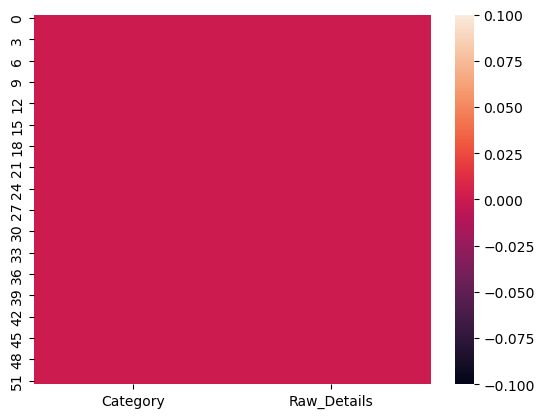

In [23]:
sns.heatmap(data.isnull())

#  TEXT MINING

### Number of word count

In [24]:
data1['Word_Count'] = data1['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
data1[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,Classification: Internal\n\nClassification: In...,558
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
4,PeopleSoft Administration\n\n \n\nVivekanand S...,2585


### Number of Characters count

In [25]:
data1['Char_Count'] = data1['Raw_Details'].str.len()
data1[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Administration\n\n \n\nVivekanand S...,16112


### number of stopword

In [26]:
import nltk

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data1['Stopwords'] =data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Administration\n\n \n\nVivekanand S...,520


###  Number of Numerics

In [29]:
data1['Numerics'] = data1['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data1[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,17


In [30]:
data1.head()

,Raw_Details,Category1,Word_Count,Char_Count,Stopwords,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,Peoplesoft,1023,8010,190,4
1,Classification: Internal\n\nClassification: In...,Peoplesoft,558,4917,114,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft,455,3800,86,15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft,918,7943,225,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft,2585,16112,520,17


#  Regular Expression

In [31]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)



In [32]:
data = pd.read_csv('Raw_Resume.csv')
data['Resume_Details'] =data.Raw_Details.apply(lambda x: preprocess(x))


In [33]:
data

,Category,Raw_Details,Resume_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,Peoplesoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,Peoplesoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,Peoplesoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,Peoplesoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,Peoplesoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


### Save the Clean Data in new CSV File

In [34]:
data.drop(['Raw_Details'], axis = 1, inplace = True)
data.head()

,Category,Resume_Details
0,Peoplesoft,anubhav kumar singh core competencies scriptin...
1,Peoplesoft,classification internal classification interna...
2,Peoplesoft,sirazuddin bangalore india sirazuddin bangalor...
3,Peoplesoft,peoplesoft admin varkala vikas career objectiv...
4,Peoplesoft,peoplesoft administration vivekanand sayana ca...


In [35]:
data.Resume_Details[10]

'name ravali curriculum vitae specialization computer science engg utilize technical skills achieving target developing best performance organization ion ion degree course college institute university board percentage cgpa year passing cgpacgpa institute technology vtu cgpa diploma aryabharathi polytechnic karnataka state board technical examination bengaluru sslc empress girls high school karnataka secondary education board manual testing skills strong knowledge sdlc concepts extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concepts good knowledge test cases test scenarios good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan goo goo ing goo goo goo goo ing goo goo agile methdology good knowledge scrum methodology expertise sprint planning meeting go

#  Named Entity Recognition (NER)

In [36]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        totalWords.append(word)
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('hcm', 94), ('support', 94), ('like', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


#  Parts Of Speech (POS) Tagging

In [38]:
!python -m spacy download en_core_web_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-2.3.1/en_core_web_lg-2.3.1.tar.gz#egg=en_core_web_lg==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Using cached en_core_web_lg-2.3.1-py3-none-any.whl
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [39]:
import en_core_web_lg
nlp = en_core_web_lg.load()

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

In [40]:
for token in doc_block[:30]:
    print(token,token.pos_)

d PROPN
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk PROPN
working PROPN
knowledge PROPN
ansible PROPN
docker PROPN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting VERB
shell NOUN
script NOUN
failures NOUN
techmahindra PROPN
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops PROPN
tools PROPN
peoplesoft PROPN
admin NOUN
skills NOUN


### filter the noun and verb from the text to tokens

In [41]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['scripting', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'core', 'competencies', 'scripting', 'scripting', 'application', 'financials', 'operating', 'system', 'web', 'app', 'servers', 'work', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'refresh', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'servers', 'process', 'scheduler', 'servers', 'applying', 'middleware', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting', 'tier', 'setup', 'requirement', 'reviewing', 'vulnerabilities', 'repor

###  Count the  all Nouns and Verbs present in a Tokens

In [42]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,experience,319
1,using,253
2,workday,216
3,application,203
4,server,180
5,reports,170
6,data,164
7,business,163
8,project,152
9,web,144


### Top 20 Nouns and Verbs in the plot

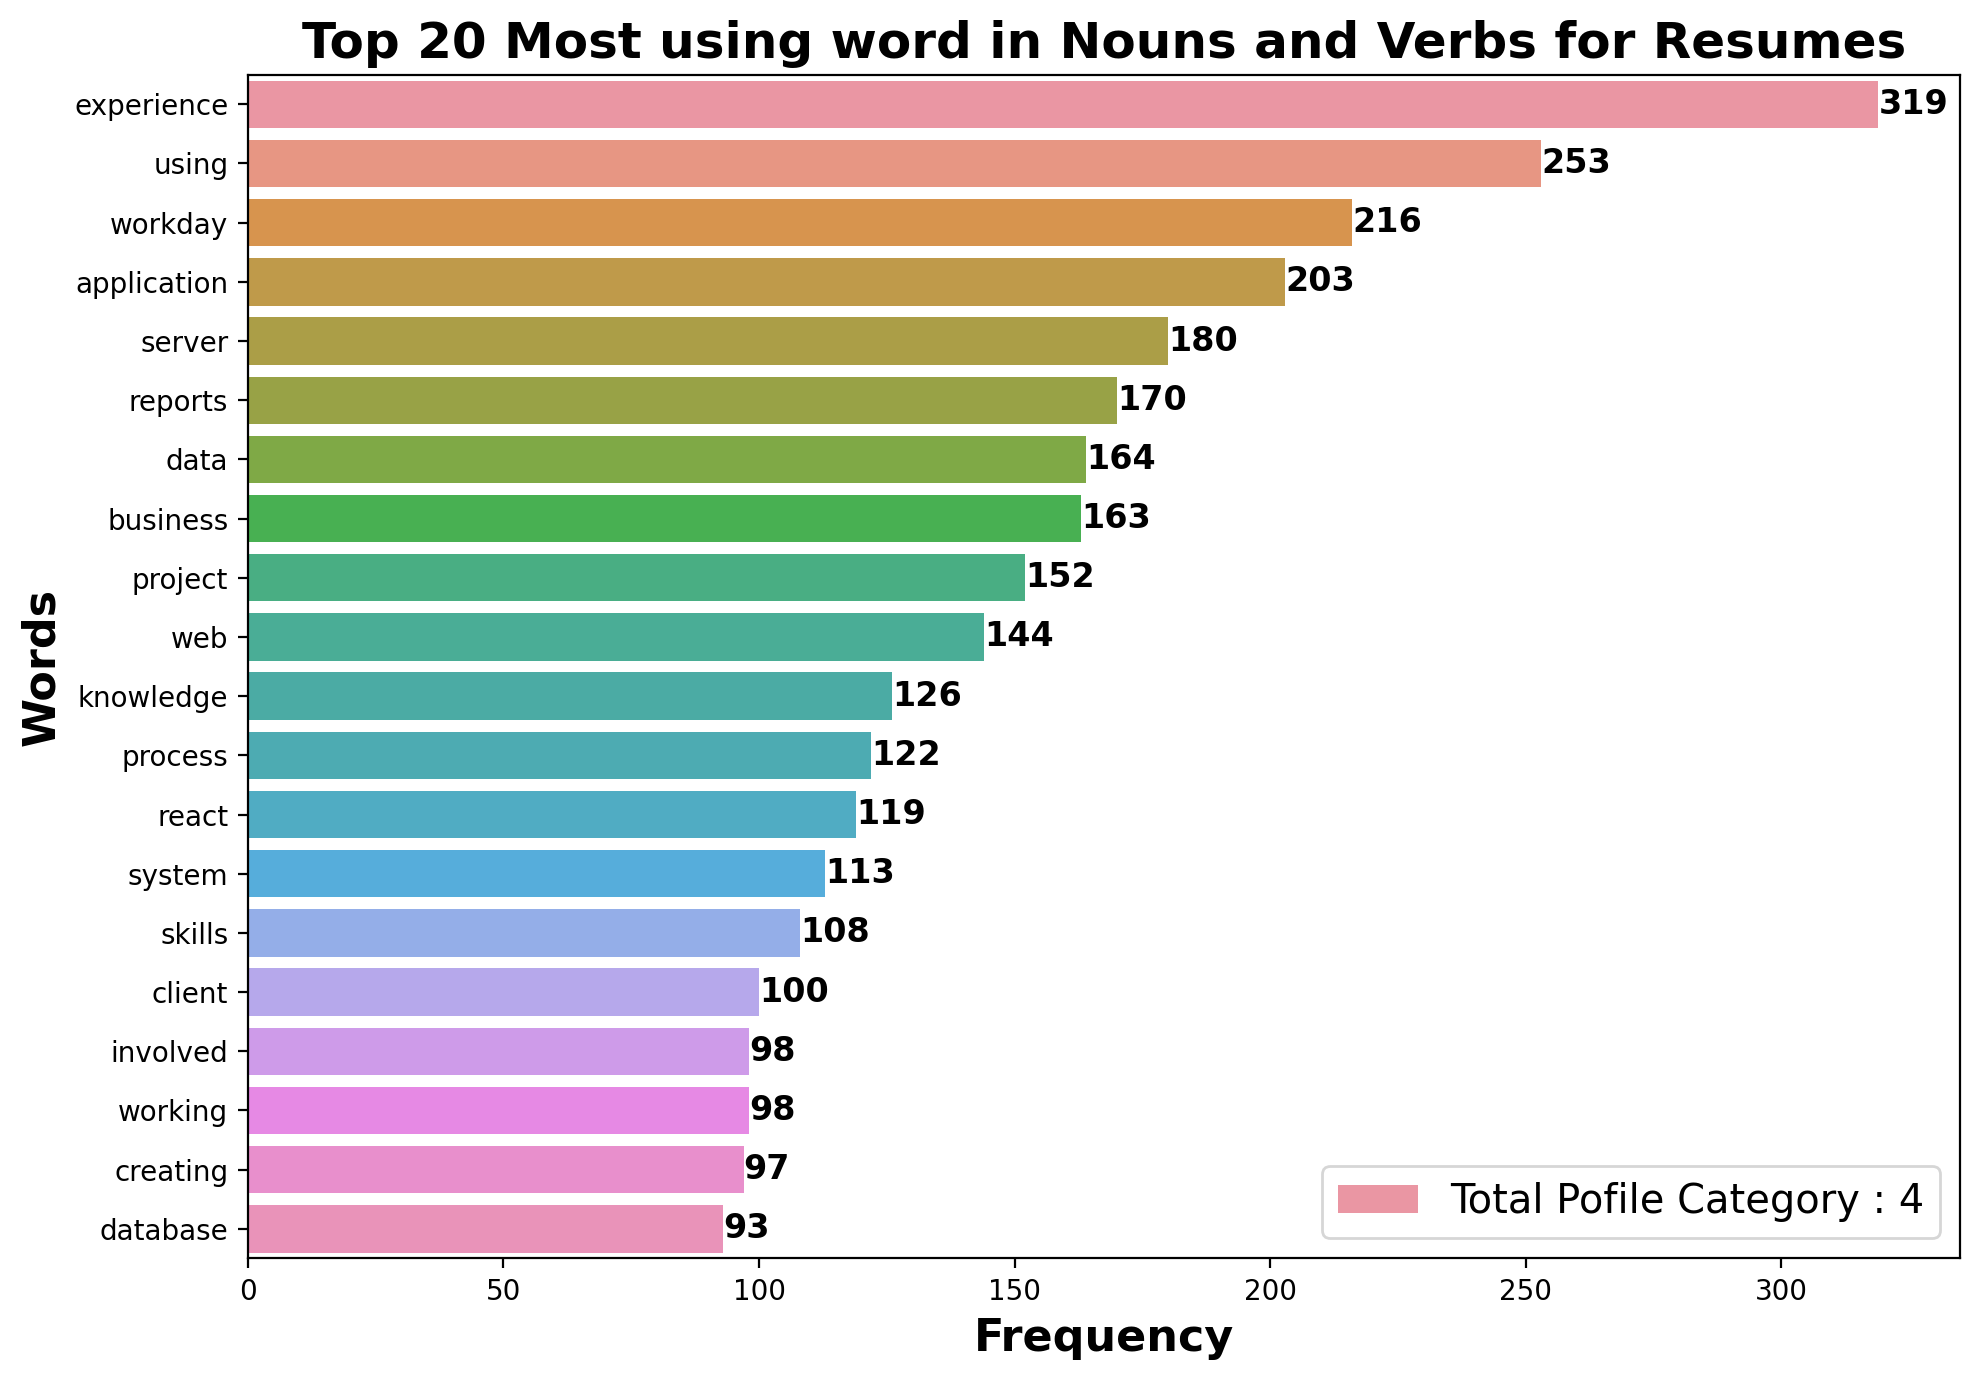

In [43]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most using word in Nouns and Verbs for Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)


fig.tight_layout()
plt.show()


# word format

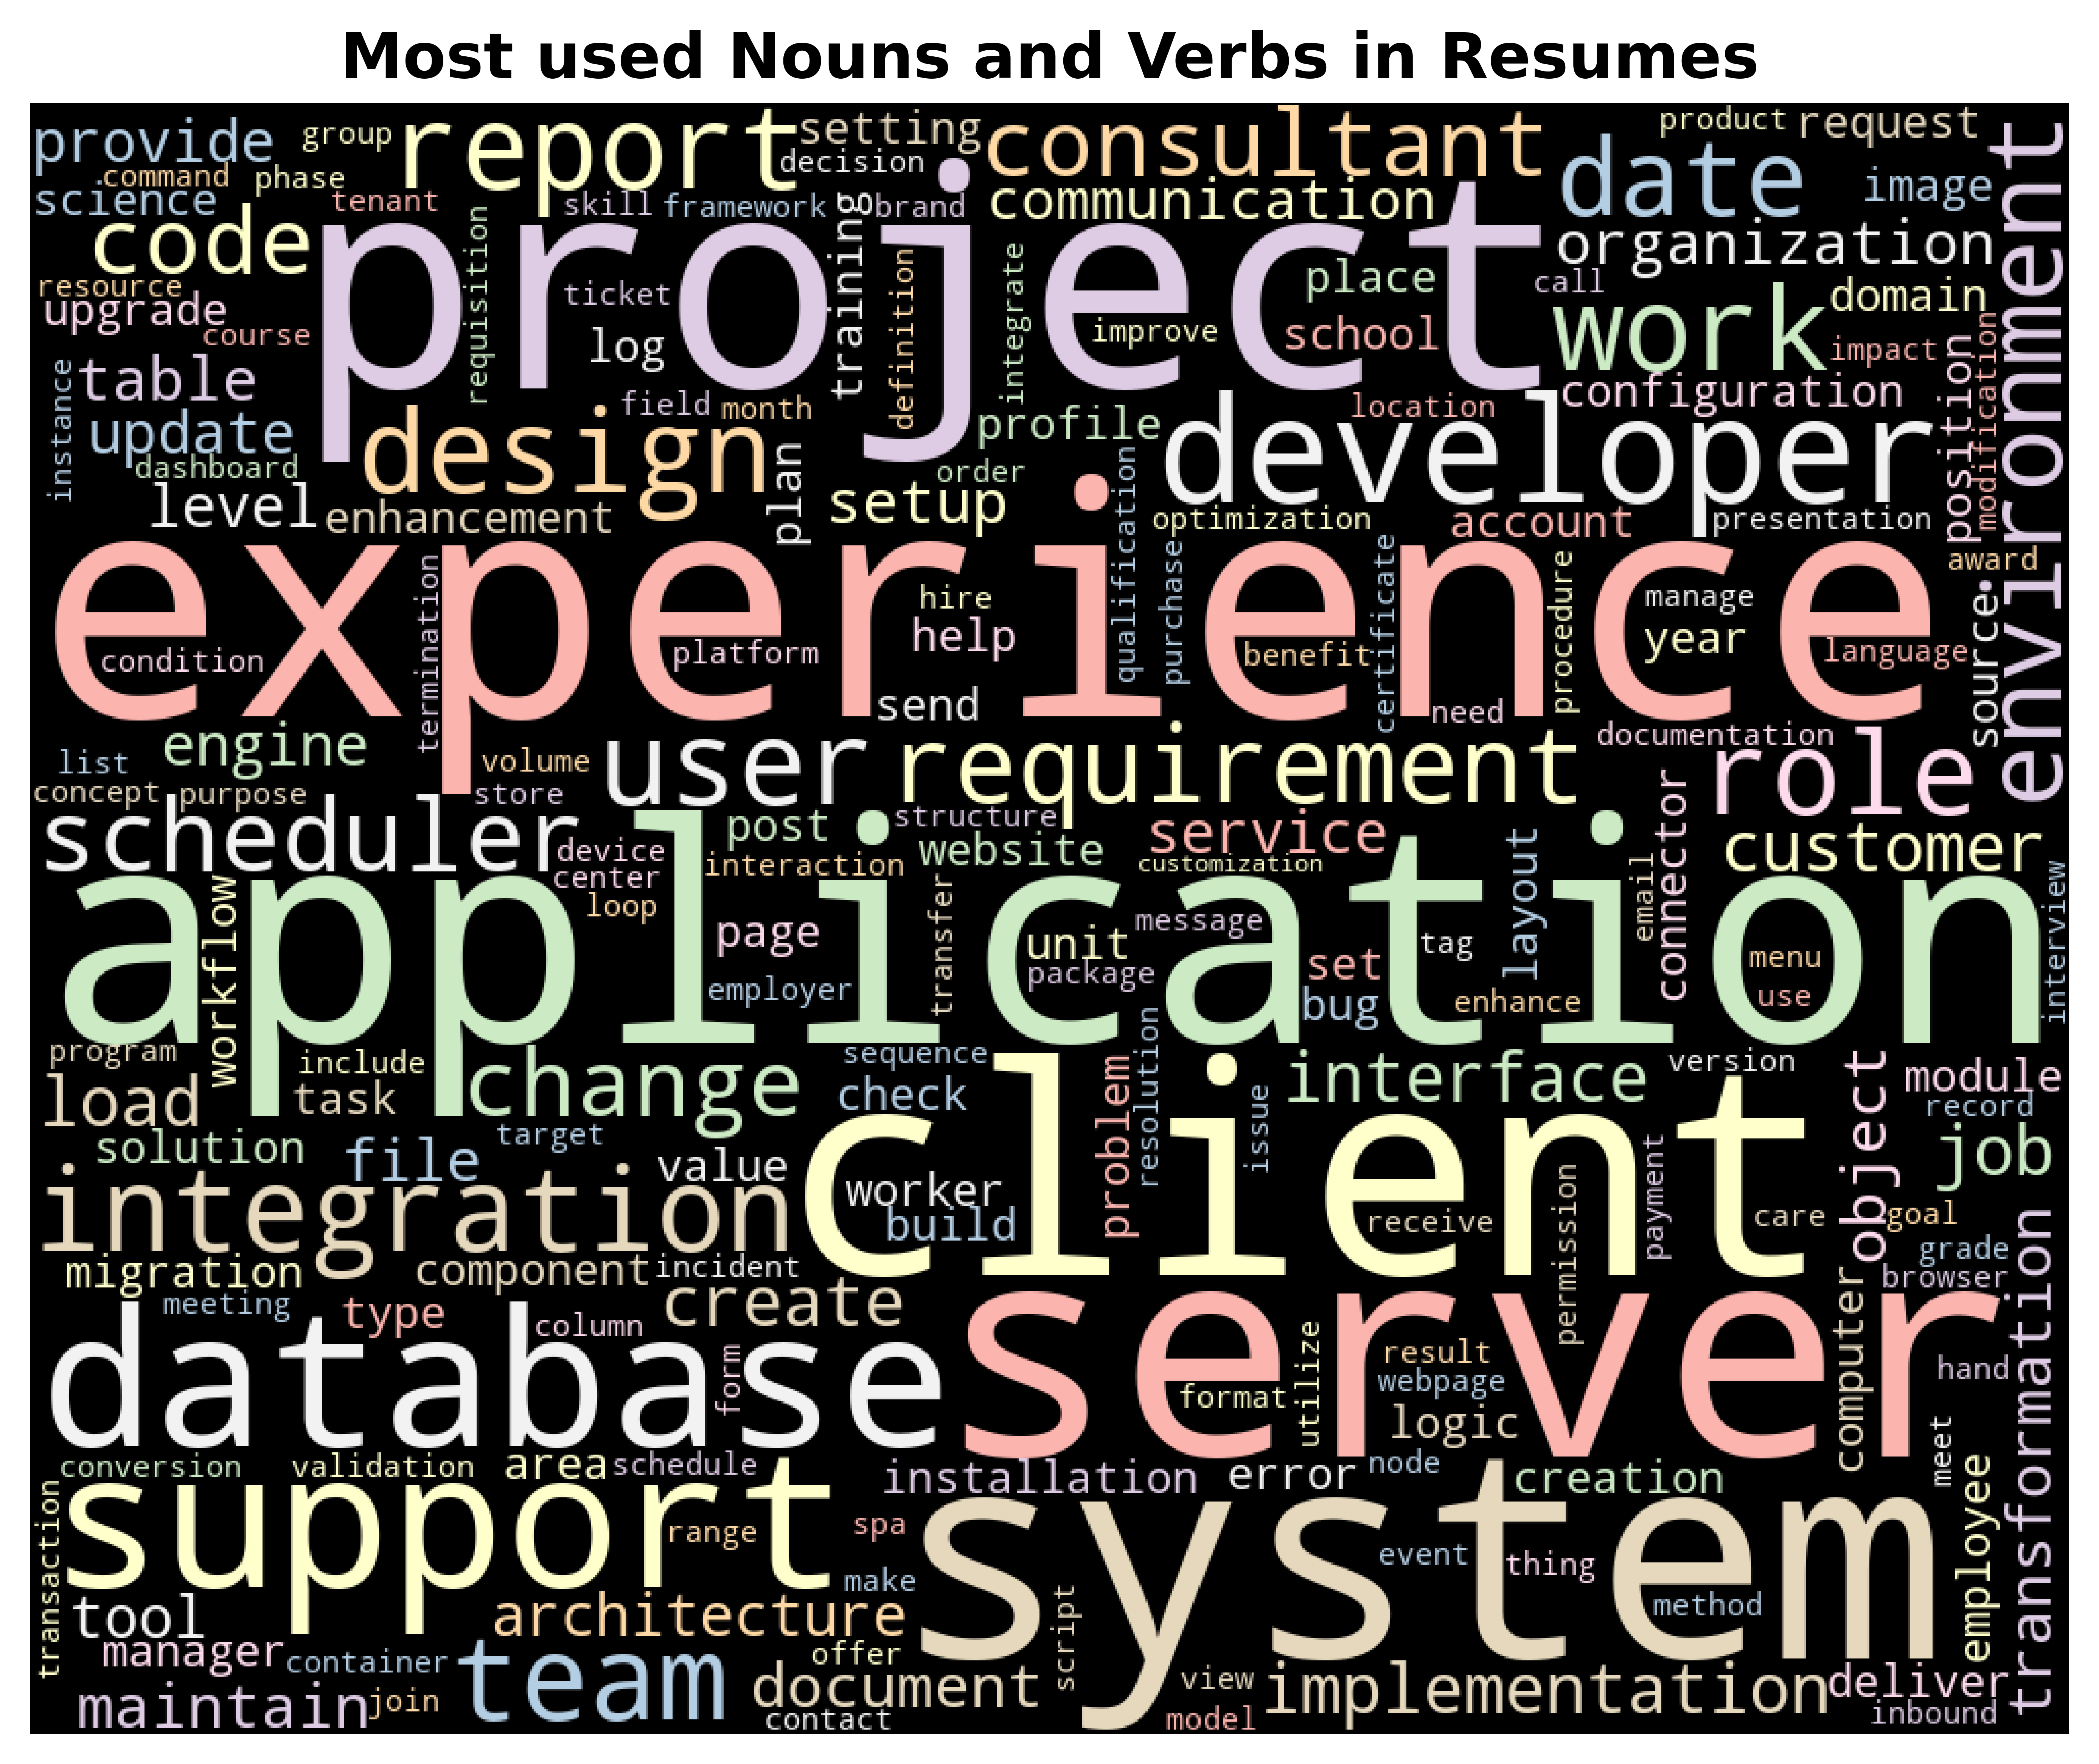

In [44]:
text = " ".join(cat for cat in wd_df.Words)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800)
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")


plt.show()

# model building

In [45]:
data=pd.read_csv("Raw_Resume.csv")
data.head()

,Category,Raw_Details
0,Peoplesoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,Peoplesoft,Classification: Internal\n\nClassification: In...
2,Peoplesoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,Peoplesoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,Peoplesoft,PeopleSoft Administration\n\n \n\nVivekanand S...


### split the data

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X= data['Raw_Details'].values
y= data['Category'].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.25)
X_train.shape, X_test.shape


((39,), (13,))

### Vectorization

###  Use BoW to convert test to numeric

In [49]:
count_vect = CountVectorizer()

In [50]:
X_train_counts = count_vect.fit_transform(X_train)

In [51]:
X_train_counts.shape

(39, 3124)

### Use TF-IDF to convert test to numeric

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [54]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [55]:
X_train.shape, X_test.shape

((39,), (13,))

In [56]:
print(y_train),print(y_test)

['React Developer' 'React Developer' 'workday' 'React Developer'
 'SQL Developer' 'workday' 'React Developer' 'SQL Developer' 'Peoplesoft'
 'SQL Developer' 'workday' 'React Developer' 'React Developer' 'workday'
 'React Developer' 'workday' 'workday' 'workday' 'workday' 'workday'
 'React Developer' 'SQL Developer' 'React Developer' 'SQL Developer'
 'React Developer' 'SQL Developer' 'React Developer' 'Peoplesoft'
 'React Developer' 'Peoplesoft' 'React Developer' 'Peoplesoft'
 'SQL Developer' 'React Developer' 'SQL Developer' 'SQL Developer'
 'Peoplesoft' 'SQL Developer' 'React Developer']
['React Developer' 'Peoplesoft' 'Peoplesoft' 'workday' 'Peoplesoft'
 'React Developer' 'Peoplesoft' 'SQL Developer' 'React Developer'
 'Peoplesoft' 'workday' 'React Developer' 'React Developer']


(None, None)

In [57]:
len(y_train),len(y_test)

(39, 13)

# Classification Models

            # MODELS
               *SVM
               *KNN
               *RandomForest
               *LogisticRegression
               *DecisionTree
               *Naive Bayes Classifier
               

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

 ### SVM Classifier

In [59]:
model1=SVC(C=0.5,gamma=0.01,kernel='rbf')

In [60]:
model1.fit(X_train_tfidf,y_train)

SVC(C=0.5, gamma=0.01)

#### prediction

In [61]:
train_pred=model1.predict(X_train_tfidf)
test_pred=model1.predict(X_test_tfidf)

#### train data

In [62]:
cm_train=confusion_matrix(y_train,train_pred)
cm_train

array([[ 0,  5,  0,  0],
       [ 0, 15,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  9,  0,  0]], dtype=int64)

<Axes: >

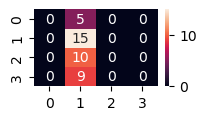

In [63]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm_train,annot=True)

In [64]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         5
React Developer       0.38      1.00      0.56        15
  SQL Developer       0.00      0.00      0.00        10
        workday       0.00      0.00      0.00         9

       accuracy                           0.38        39
      macro avg       0.10      0.25      0.14        39
   weighted avg       0.15      0.38      0.21        39



##### test data

In [65]:
cm_test=confusion_matrix(y_test,test_pred)
cm_test

array([[0, 5, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0]], dtype=int64)

<Axes: >

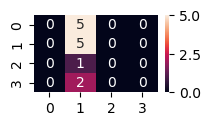

In [66]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm_test,annot=True)

In [67]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         5
React Developer       0.38      1.00      0.56         5
  SQL Developer       0.00      0.00      0.00         1
        workday       0.00      0.00      0.00         2

       accuracy                           0.38        13
      macro avg       0.10      0.25      0.14        13
   weighted avg       0.15      0.38      0.21        13



In [68]:
print('Accuracy of training set : {:.2f}'.format(model1.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model1.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.38
Accuracy of  test set    : 0.38


# KNN

In [69]:
model2=KNeighborsClassifier(n_neighbors=5)

In [70]:
model2.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

### prediction

### test data

In [71]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[0, 5, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0]], dtype=int64)

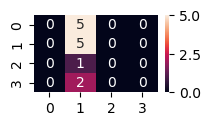

In [72]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [73]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         5
React Developer       0.38      1.00      0.56         5
  SQL Developer       0.00      0.00      0.00         1
        workday       0.00      0.00      0.00         2

       accuracy                           0.38        13
      macro avg       0.10      0.25      0.14        13
   weighted avg       0.15      0.38      0.21        13



In [74]:
print('Accuracy of training set : {:.2f}'.format(model2.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model2.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.95
Accuracy of  test set    : 0.77


# RandomForest

In [75]:
model3=RandomForestClassifier(n_estimators=50,max_features=4,max_depth=8)

In [76]:
model3.fit(X_train_tfidf,y_train)

RandomForestClassifier(max_depth=8, max_features=4, n_estimators=50)

### prediction

In [77]:
rftrain_pred=model3.predict(X_train_tfidf)
rftest_pred=model3.predict(X_test_tfidf)


### train data

In [78]:
cm=confusion_matrix(y_train,rftrain_pred)
cm

array([[ 5,  0,  0,  0],
       [ 0, 15,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  9]], dtype=int64)

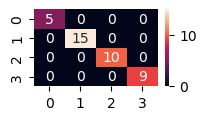

In [79]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [80]:
print(classification_report(y_train,rftrain_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00        15
  SQL Developer       1.00      1.00      1.00        10
        workday       1.00      1.00      1.00         9

       accuracy                           1.00        39
      macro avg       1.00      1.00      1.00        39
   weighted avg       1.00      1.00      1.00        39



### test data

In [81]:
cm=confusion_matrix(y_test,rftest_pred)
cm

array([[2, 3, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 1]], dtype=int64)

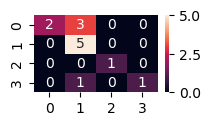

In [82]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [83]:
print(classification_report(y_test,rftest_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.40      0.57         5
React Developer       0.56      1.00      0.71         5
  SQL Developer       1.00      1.00      1.00         1
        workday       1.00      0.50      0.67         2

       accuracy                           0.69        13
      macro avg       0.89      0.72      0.74        13
   weighted avg       0.83      0.69      0.67        13



In [84]:
print('Accuracy of training set : {:.2f}'.format(model3.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model3.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.69


# LogisticRegression

In [85]:
model4=LogisticRegression()

In [86]:
model4.fit(X_train_tfidf,y_train)

LogisticRegression()

### prediction

In [87]:
train_pred=model4.predict(X_train_tfidf)
test_pred=model4.predict(X_test_tfidf)


### train data

In [88]:
confusion_matrix(y_train,train_pred)

array([[ 4,  1,  0,  0],
       [ 0, 15,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  9]], dtype=int64)

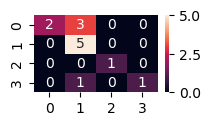

In [89]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [90]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.80      0.89         5
React Developer       0.94      1.00      0.97        15
  SQL Developer       1.00      1.00      1.00        10
        workday       1.00      1.00      1.00         9

       accuracy                           0.97        39
      macro avg       0.98      0.95      0.96        39
   weighted avg       0.98      0.97      0.97        39



test data

In [91]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[1, 4, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 2]], dtype=int64)

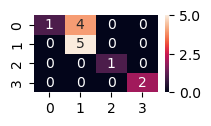

In [92]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [93]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.20      0.33         5
React Developer       0.56      1.00      0.71         5
  SQL Developer       1.00      1.00      1.00         1
        workday       1.00      1.00      1.00         2

       accuracy                           0.69        13
      macro avg       0.89      0.80      0.76        13
   weighted avg       0.83      0.69      0.63        13



In [94]:
print('Accuracy of training set : {:.2f}'.format(model4.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model4.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.97
Accuracy of  test set    : 0.69


# DecisionTree

In [95]:
model5=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10)

In [96]:
model5.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10)

#### pridiction

In [97]:
train_pred=model5.predict(X_train_tfidf)
test_pred=model5.predict(X_test_tfidf)

train data

In [98]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[ 0,  0,  0,  5],
       [ 0, 15,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  9]], dtype=int64)

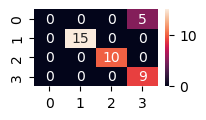

In [99]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [100]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         5
React Developer       1.00      1.00      1.00        15
  SQL Developer       1.00      1.00      1.00        10
        workday       0.64      1.00      0.78         9

       accuracy                           0.87        39
      macro avg       0.66      0.75      0.70        39
   weighted avg       0.79      0.87      0.82        39



test data

In [101]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[0, 0, 2, 3],
       [0, 5, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 2]], dtype=int64)

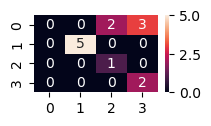

In [102]:
plt.figure(figsize=(2,1))
sns.heatmap(data=cm,annot=True)
plt.show()

In [103]:
print(classification_report(y_test,test_pred))

                 precision    recall  f1-score   support

     Peoplesoft       0.00      0.00      0.00         5
React Developer       1.00      1.00      1.00         5
  SQL Developer       0.33      1.00      0.50         1
        workday       0.40      1.00      0.57         2

       accuracy                           0.62        13
      macro avg       0.43      0.75      0.52        13
   weighted avg       0.47      0.62      0.51        13



In [104]:
print('Accuracy of training set : {:.2f}'.format(model5.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model5.score(X_test_tfidf, y_test)))

Accuracy of training set : 0.87
Accuracy of  test set    : 0.62


# Naive Bayes Classifier

In [105]:
model6 =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)

In [106]:
model6.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [107]:
train_pred=model6.predict(X_train_tfidf)
test_pred=model6.predict(X_test_tfidf)

train data

In [108]:
confusion_matrix(y_train,train_pred)


array([[ 5,  0,  0,  0],
       [ 0, 15,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0,  9]], dtype=int64)

In [109]:
print(classification_report(y_train,train_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      1.00      1.00         5
React Developer       1.00      1.00      1.00        15
  SQL Developer       1.00      1.00      1.00        10
        workday       1.00      1.00      1.00         9

       accuracy                           1.00        39
      macro avg       1.00      1.00      1.00        39
   weighted avg       1.00      1.00      1.00        39



test data

In [110]:
confusion_matrix(y_test,test_pred)

array([[3, 1, 0, 1],
       [0, 5, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 2]], dtype=int64)

In [111]:
print(classification_report(y_test
                            ,test_pred))

                 precision    recall  f1-score   support

     Peoplesoft       1.00      0.60      0.75         5
React Developer       0.83      1.00      0.91         5
  SQL Developer       1.00      1.00      1.00         1
        workday       0.67      1.00      0.80         2

       accuracy                           0.85        13
      macro avg       0.88      0.90      0.86        13
   weighted avg       0.88      0.85      0.84        13



In [112]:
print('Accuracy of training set : {:.2f}'.format(model6.score(X_train_tfidf, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model6.score(X_test_tfidf, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.85


In [114]:
import joblib

# Assuming 'clf' is your DecisionTreeClassifier instance
clf = DecisionTreeClassifier()
# Train your model

# Save the model
joblib.dump(clf, 'modelDT.pkl')


['modelDT.pkl']